In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
df = pd.read_csv('data/diabetic_data.csv', encoding = 'latin1',low_memory=False)

In [2]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [63]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/diabetic_data.csv', encoding = 'latin1',low_memory=False)
df.readmitted[df.readmitted == 'NO' ] = 0
df.readmitted[df.readmitted == '<30' ] = 1
df = df.drop(df[df.readmitted == '>30'].index)
df.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)
df.dropna(axis=1, how='all')
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['readmitted'])
#X = pd.get_dummies(X)

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
int_categorical_headers = [
'admission_type_id',
'discharge_disposition_id',
'admission_source_id',
]
numeric_headers = [
    "time_in_hospital", 
    "num_lab_procedures", 
    "num_procedures", 
    "num_medications", 
    "number_outpatient", 
    "number_emergency", 
    "number_inpatient", 
    "number_diagnoses",
]
categorical_headers = [
 'diag_3',
 'diag_2',
 'diag_1',
 'race',
 'gender',
 'age',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

df_train.replace(to_replace=' ?',value=np.nan, inplace=True)
df_train.dropna(inplace=True)
df_train.reset_index()

df_test.replace(to_replace=' ?',value=np.nan, inplace=True)
df_test.dropna(inplace=True)
df_test.reset_index()

encoders = dict()



for col in categorical_headers:
    df[col] = df[col].str.strip()
    df_train[col] = df_train[col].str.strip()
    df_test[col] = df_test[col].str.strip()
    

    encoders[col] = LabelEncoder()
    df[col+'_int'] = encoders[col].fit_transform(df[col])
    df_train[col+'_int'] = encoders[col].transform(df_train[col])
    df_test[col+'_int'] = encoders[col].transform(df_test[col])
    
    
    
for col in int_categorical_headers:
    df[col+'_int'] = df[col]
    df_train[col+'_int'] = df_train[col]
    df_test[col+'_int'] = df_test[col]

for col in numeric_headers:
    df_train[col] = df_train[col].astype(np.float)
    df_test[col] = df_test[col].astype(np.float)
    df[col] = df[col].astype(np.float)
    ss = StandardScaler()
    df[col] = ss.fit_transform(df[col].values.reshape(-1, 1))
    df_train[col] = ss.transform(df_train[col].values.reshape(-1, 1))
    df_test[col] = ss.transform(df_test[col].values.reshape(-1, 1))

    
df_train.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin-rosiglitazone_int,metformin-pioglitazone_int,change_int,diabetesMed_int,admission_type_id_int,discharge_disposition_id_int,admission_source_id_int,diag_1_int,diag_2_int,diag_3_int
7271,Caucasian,Female,[80-90),6,3,7,0.220462,1.384487,-0.225250,0.968233,...,0,0,1,0,6,3,7,384,231,252
36554,AfricanAmerican,Female,[50-60),1,1,7,-0.785524,0.116738,-0.805627,-0.582235,...,0,0,0,1,1,1,7,271,229,98
2794,Caucasian,Male,[10-20),1,5,7,-1.120853,0.015318,-0.805627,0.133365,...,0,0,0,1,1,5,7,95,615,640
43575,Caucasian,Male,[70-80),2,1,1,0.220462,-1.607400,-0.805627,-0.462968,...,0,0,1,1,2,1,1,242,248,255
87996,Caucasian,Male,[60-70),3,11,1,0.891119,0.623838,2.096259,3.234301,...,0,0,0,1,3,11,1,506,251,189


In [37]:
from sklearn import metrics as mt

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.layers import Embedding, Flatten, Merge, concatenate
from keras.models import Model

In [22]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2086175645325556394
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 52215808
locality {
  bus_id: 1
}
incarnation: 16436869601768631615
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


## Starting work on the actual deep and wide network

In [39]:
master_numeric_headers = numeric_headers + int_categorical_headers
categorical_headers_ints = [x+'_int' for x in categorical_headers]
df_num =  df[numeric_headers].values
X_train_num =  df_train[master_numeric_headers].values
X_test_num =  df_test[master_numeric_headers].values
y_train = df_train['readmitted'].values.astype(np.int)
y_test = df_test['readmitted'].values.astype(np.int)

In [15]:
print(master_categorical_headers)

['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3']


In [40]:
cross_columns = [['gender','race'],
                 ['age', 'diag_1'],
                ['gender', 'diag_1']]

## 1) Standard Configuration Wide and Deep Network

In [ ]:
# we need to create separate sequential models for each embedding
import tensorflow as tf
with tf.device('/GPU:0'):
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        # needs to be commented better, Eric!
        X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
        X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_branch_outputs)

    # reset this input branch
    all_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( df_train[col].values )
        X_ints_test.append( df_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False,name='numeric_data'))
    x = Dense(units=20, activation='relu')(all_inputs[-1])
    all_branch_outputs.append( x )

    # merge the branches together
    deep_branch = concatenate(all_branch_outputs)
    deep_branch = Dense(units=50,activation='relu')(deep_branch)
    deep_branch = Dense(units=10,activation='relu')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch])
    final_branch = Dense(units=1,activation='sigmoid')(final_branch)

    model1 = Model(inputs=all_inputs, outputs=final_branch)

    model1.compile(optimizer='adagrad',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model1.fit(X_ints_train+ [X_train_num],
            y_train, epochs=10, batch_size=32, verbose=1)

## 2) Deeper "Deep Network"

In [44]:
# we need to create separate sequential models for each embedding
import tensorflow as tf
with tf.device('/GPU:0'):
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        # needs to be commented better, Eric!
        X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
        X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_branch_outputs)

    # reset this input branch
    all_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( df_train[col].values )
        X_ints_test.append( df_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False,name='numeric_data'))
    x = Dense(units=20, activation='relu')(all_inputs[-1])
    all_branch_outputs.append( x )

    # merge the branches together
    deep_branch = concatenate(all_branch_outputs)
    deep_branch = Dense(units=50,activation='relu')(deep_branch)
    deep_branch = Dense(units=40,activation='relu')(deep_branch)
    deep_branch = Dense(units=30,activation='relu')(deep_branch)
    deep_branch = Dense(units=20,activation='relu')(deep_branch)
    deep_branch = Dense(units=10,activation='relu')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch])
    final_branch = Dense(units=1,activation='sigmoid')(final_branch)

    model2 = Model(inputs=all_inputs, outputs=final_branch)

    model2.compile(optimizer='adagrad',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model2.fit(X_ints_train+ [X_train_num],
            y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
52976/52976 [==============================] - 35s - loss: 0.4222 - acc: 0.8331    
Epoch 2/10
52976/52976 [==============================] - 33s - loss: 0.4036 - acc: 0.8370    
Epoch 3/10
52976/52976 [==============================] - 32s - loss: 0.3952 - acc: 0.8394    
Epoch 4/10
52976/52976 [==============================] - 32s - loss: 0.3887 - acc: 0.8403    
Epoch 5/10
52976/52976 [==============================] - 33s - loss: 0.3836 - acc: 0.8420    
Epoch 6/10
52976/52976 [==============================] - 33s - loss: 0.3792 - acc: 0.8435    
Epoch 7/10
52976/52976 [==============================] - 33s - loss: 0.3758 - acc: 0.8442    
Epoch 8/10
52976/52976 [==============================] - 33s - loss: 0.3725 - acc: 0.8457    
Epoch 9/10
52976/52976 [==============================] - 33s - loss: 0.3696 - acc: 0.8466    
Epoch 10/10
52976/52976 [==============================] - 32s - loss: 0.3667 - acc: 0.8475    


## 3) Deeper Final Stage

In [49]:
# we need to create separate sequential models for each embedding
import tensorflow as tf
with tf.device('/GPU:0'):
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        # needs to be commented better, Eric!
        X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
        X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_branch_outputs)

    # reset this input branch
    all_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( df_train[col].values )
        X_ints_test.append( df_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False,name='numeric_data'))
    x = Dense(units=20, activation='relu')(all_inputs[-1])
    all_branch_outputs.append( x )

    # merge the branches together
    deep_branch = concatenate(all_branch_outputs)
    deep_branch = Dense(units=50,activation='relu')(deep_branch)
    deep_branch = Dense(units=10,activation='relu')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch])
    final_branch = Dense(units=50,activation='sigmoid')(final_branch)
    final_branch = Dense(units=1,activation='sigmoid')(final_branch)

    model3 = Model(inputs=all_inputs, outputs=final_branch)

    model3.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model3.fit(X_ints_train+ [X_train_num],
            y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
52976/52976 [==============================] - 38s - loss: 0.4261 - acc: 0.8306    
Epoch 2/10
52976/52976 [==============================] - 36s - loss: 0.4033 - acc: 0.8376    - E
Epoch 3/10
52976/52976 [==============================] - 36s - loss: 0.3906 - acc: 0.8397    
Epoch 4/10
52976/52976 [==============================] - 36s - loss: 0.3796 - acc: 0.8442    
Epoch 5/10
52976/52976 [==============================] - 36s - loss: 0.3693 - acc: 0.8471    
Epoch 6/10
52976/52976 [==============================] - 36s - loss: 0.3591 - acc: 0.8503    
Epoch 7/10
52976/52976 [==============================] - 36s - loss: 0.3494 - acc: 0.8553    
Epoch 8/10
52976/52976 [==============================] - 36s - loss: 0.3394 - acc: 0.8594    - ETA: 0s - loss: 0.3396 - acc: 
Epoch 9/10
52976/52976 [==============================] - 36s - loss: 0.3298 - acc: 0.8629    
Epoch 10/10
52976/52976 [==============================] - 36s - loss: 0.3201 - acc: 0.8680    


In [45]:
yhat = np.round(model.predict(X_ints_test + [X_test_num]))
print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

[[10673   300]
 [ 1965   307]] 0.82899207248


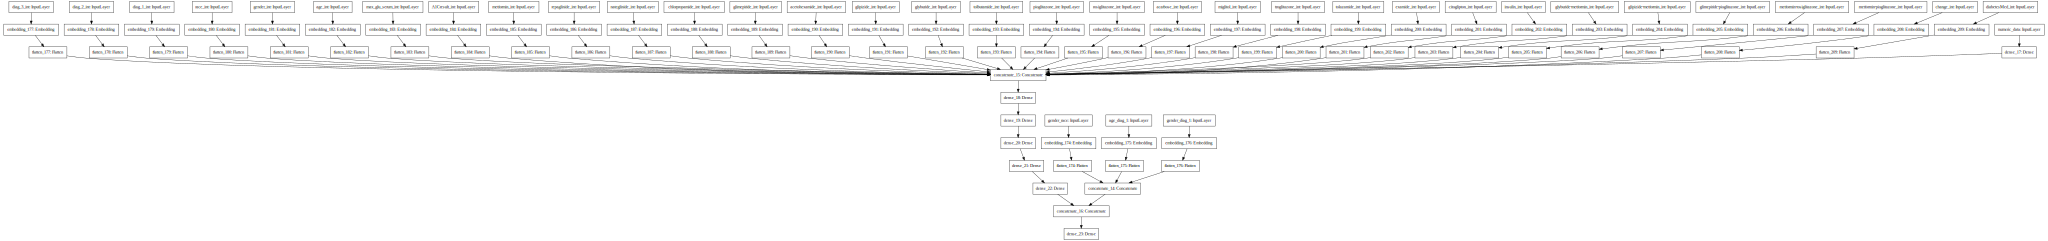

In [46]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

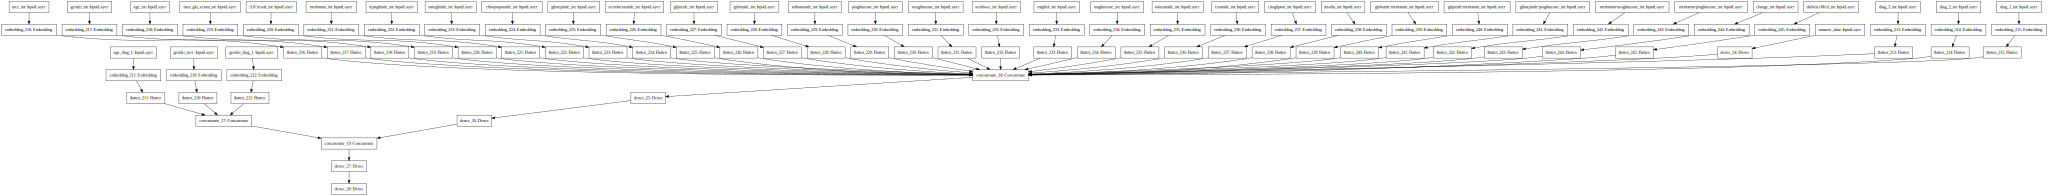

In [48]:
SVG(model_to_dot(model3).create(prog='dot', format='svg'))

## SKLearn MLP 

In [76]:
from sklearn.neural_network import MLPClassifier

df_dummies = pd.get_dummies(df, columns=categorical_headers)

df_dummies_train, df_dummies_test = train_test_split(df_dummies, test_size=0.2, stratify=df_dummies['readmitted'])
y_train_sk = df_dummies_train['readmitted']
y_test_sk = df_dummies_test['readmitted']
df_dummies_train.drop(['readmitted'], axis=1, inplace=True)
df_dummies_test.drop(['readmitted'], axis=1, inplace=True)

clf = MLPClassifier()
clf.fit(X=df_dummies_train.values, y=np.asarray(y_train_sk.values, dtype="|S6"))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [88]:
yhat_sk = clf.predict(df_dummies_test.values)
print(mt.confusion_matrix(y_test_sk.values.astype(int),yhat_sk.astype(int)),mt.accuracy_score(y_test_sk.values.astype(int),yhat_sk.astype(int)))

[[9540 1433]
 [1682  590]] 0.764816912042
